# Sentiment Analysis

<hr>

# References

* Many to Many LSTM : http://karpathy.github.io/2015/05/21/rnn-effectiveness/
* Contextual LSTM (CLSTM) models for Large scale NLP tasks [[ref]](https://arxiv.org/pdf/1602.06291.pdf)
* Deep Sentiment Classification and Topic Discovery COVID19... [[ref]](https://arxiv.org/pdf/2004.11695.pdf)

<br>

# Approach

### `Approach-1` : Non -Neural Network

Making use of standard techniques is via Tokenization followed by Bag of Words, TFIDF followed by an ML algorithm

**`Bag of Words`**

This suits well when the connections or tenses play almost no role, `context` is extracted via tokenization. This is suited when the target representation is unique, and found with a single word

**`Term Frequency, Inverse Document Frequency (TFIDF)`**

The purpose of this approach is to identify the set of important words statistically from a document. 

<br>

### `Approach-2` : Neural Network

`LSTM` is the network of choice here, because of a sequence of words in their `Embedded representation`. But, there are hybrid models like `CNN+LSTM` which extract features locally and later on tend to show up locally. 

Every classification attribute i.e an emotion is binary in nature. Hence, **many-to-many LSTM** would be a good start. However note that, this is not a purely sequence prediction problem like time series rather a `loosely connected set of words` representing an array emotion needs to be deduced

**Many-To-Many LSTM**, this [[blog]](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) by AI expert Andrei Karpathy, Director of AI @ Tesla, gives an excellent description for many-to-many RNN

<br>

<hr>


## Navigation <a id="navig"></a>

* Data Cleaning <a href="#data_cleaning">$[\downarrow]$</a>
* Data Analysis <a href="#data_analysis">$[\downarrow]$</a>
* Approach-1: single emotion <a href="#approach-1-A">$[\downarrow]$</a>
* Approach-2: single emotion <a href="#approach-2-A">$[\downarrow]$</a>
* Approach-2: multiple emotion <a href="#approach-2-B">$[\downarrow]$</a>

<br><hr>

# Code Snippets 

<a id="data_cleaning"></a>

## Data Cleaning <a href="#navig">$[\uparrow]$</a>

In [1]:
import pandas as pd
import re

df1 = pd.read_csv('dataset1.csv')

# The main dataset looks relatively clean, so just using the 'regex string' to clean it up
df1['text'] = df1.text.apply(lambda x: re.subn('^\s+|\(|\)|[:,0-9\'\)\(\\[\]]|@user|RT|(https://.*)', '', x)[0])

## Data Analysis <a href="#navig">$[\uparrow]$</a>

In [3]:
import pandas as pd

<br>

This plot shows that a single statement can convey an array of emotions.  Implies there is a lot of correlation between what word vectors will refer to. `many-to-many LSTM` being a fairly good start

`thankfulness`, and `surprise` is widely connected to many of the emotions, followed by `love`

<AxesSubplot:>

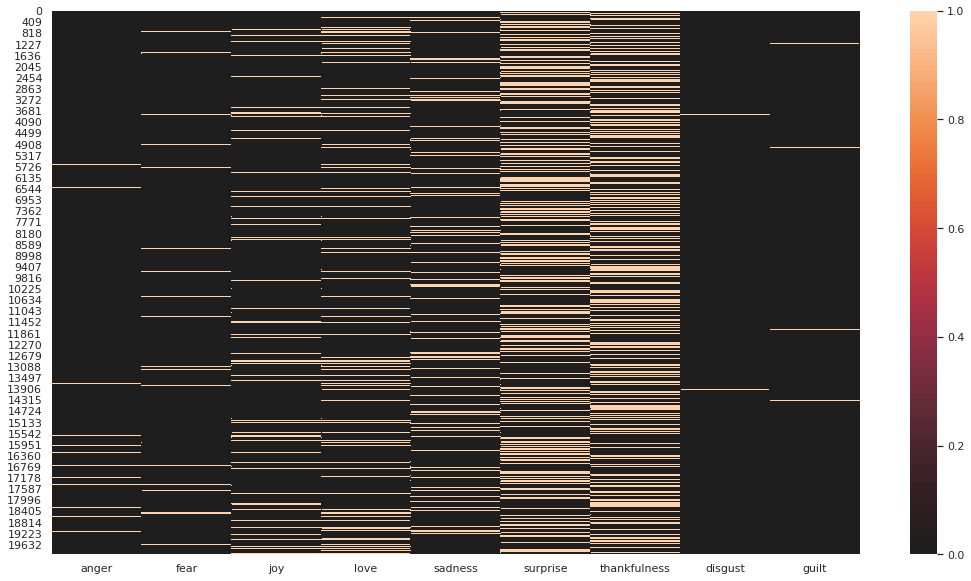

In [4]:
import seaborn as sns

df1 = pd.read_csv('dataset1.csv')
sns.set(rc={'figure.figsize':(18.10,10)})
sns.heatmap(df1[df1.columns[1:]], center=0)

In [5]:
# note that, this is because of boolean options for emotions. 
# Ideally it should have been continuous

df1['joy'].corr(df1['thankfulness']) 

-0.20626852424586054

<br>

## Data Set is `unbalanced` : important to assess this to keep/drop 

`guilt, disgust` are two emotions are almost not significant, similarly `anger, fear` could also be dropped 

Count of emotions whose value is equal to unity is plotted

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise', 'thankfulness', 'disgust', 'guilt'] [0.0228, 0.027, 0.10835, 0.14205, 0.12625, 0.34715, 0.3652, 0.00415, 0.004]


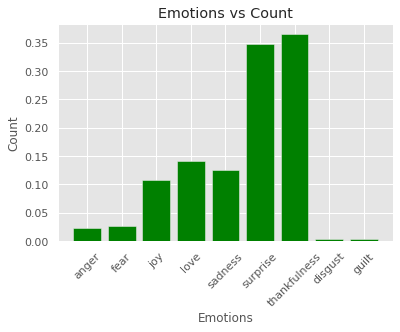

consistency check total em:  1.1469500000000001


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

N = df1.shape[0]
x = [e for e in df1.columns[1:]]
em = [df1[df1[e] == 1].shape[0]/N for e in df1.columns[1:]]

print(x, em)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, em, color='green')
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Emotions vs Count")

plt.xticks(x_pos, x, rotation='45')
plt.show()

print('consistency check total em: ', sum(em))

In [7]:
# Import necessary modules
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
#import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

<a id="approach-1-A"></a>

## Machine Learning based, for one `emotion` only <a href="#navig">$[\uparrow]$</a>

### Using SVC for classification

**Sadness**

In [31]:
df1 = pd.read_csv('dataset1.csv')
# change the variable here
emotion = 'sadness'
dt = df1[['text',emotion]]
X = dt.text
y = dt[emotion]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=57)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=100)

# Create tfidf train and test variables
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print('Feature Names: ', 'sadness')
#print(tfidf_vectorizer.get_feature_names())
set_sadness = tfidf_vectorizer.get_feature_names()

# Create a LinearSVC model
tfidf_svc = LinearSVC()

# Train model
tfidf_svc.fit(X_train_tfidf, y_train)

# Run predict on tfidf test data to get predictions
tfidf_svc_pred = tfidf_svc.predict(X_test_tfidf)

# Calculate accuracy using the metrics module
tfidf_svc_score = tfidf_svc.score(X_test_tfidf, y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, tfidf_svc_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

Feature Names:  sadness
LinearSVC Score:   0.874


0.0  1.0
0.0  4339   17
1.0   614   30

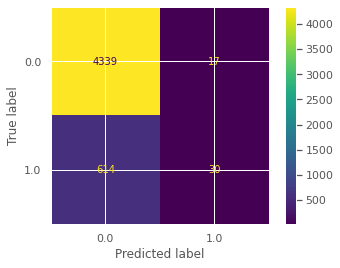

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix (tfidf_svc, X_test_tfidf, y_test)

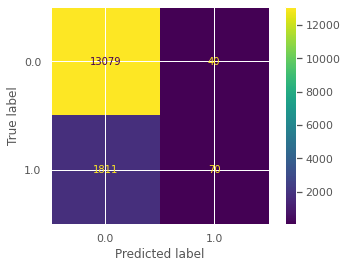

In [10]:
plot_confusion_matrix (tfidf_svc, X_train_tfidf, y_train)

In [32]:
df1 = pd.read_csv('dataset1.csv')
# change the variable here
emotion = 'surprise'
dt = df1[['text',emotion]]
X = dt.text
y = dt[emotion]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=57)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=100)

# Create tfidf train and test variables
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print('Feature Names : ', 'surprise')
set_surprise = tfidf_vectorizer.get_feature_names()

# Create a LinearSVC model
tfidf_svc = LinearSVC()

# Train model
tfidf_svc.fit(X_train_tfidf, y_train)
print(X_train_tfidf.shape, y_train.shape)

# Run predict on tfidf test data to get predictions
tfidf_svc_pred = tfidf_svc.predict(X_test_tfidf)

# Calculate accuracy using the metrics module
tfidf_svc_score = tfidf_svc.score(X_test_tfidf, y_test)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

# Print Confusion Matrix
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, tfidf_svc_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

Feature Names :  surprise
(15000, 149) (15000,)
LinearSVC Score:   0.777


0.0  1.0
0.0  3061  223
1.0   893  823

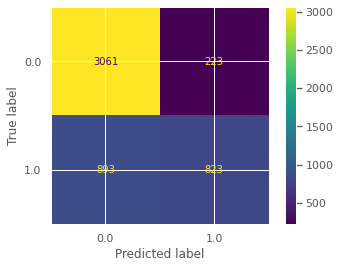

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix (tfidf_svc, X_test_tfidf, y_test)

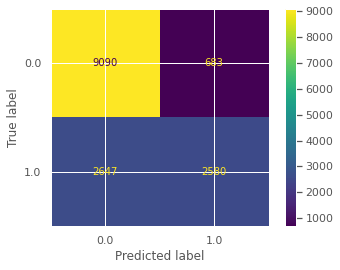

In [13]:
plot_confusion_matrix (tfidf_svc, X_train_tfidf, y_train)

### Some Conclusions: non-neural network

* Emotion has correlations with other emotions for the same sentences. i.e. one sentence links to several emotions, and mathematically

$$
\{s\}\rightarrow [e_1,e_2,\cdots ]
$$

where $s$: sentence, $e_k$:emotion

<a id="approach-2-A"></a>

## LSTM for single emotion <a href="#navig">$[\uparrow]$</a>

Since a single emotion is a `binary classification`, this model would be a good start to understand ignoring what other emotions the sentence references. 

In principle a set of lstm blocks can be concatenated `train over emotions independently`, and combine them into categories providing a fine control over the model but at the expense of complexity. While no hyper-parameter optimization is performed

Surprise seems like a dominant emotion eo experiment with.

The basic neural network structure is put here with all the key elements, i.e. in the `RNN` class

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

emotion = "surprise"
df1 = pd.read_csv('dataset1.csv')
X = df1.text
Y = df1.surprise

le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
print(X_train.shape, Y_train.shape)

max_words = 3000
max_len = 250
tok = Tokenizer(num_words=max_words,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


def RNN():
    
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

history = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

accr = model.evaluate(test_sequences_matrix,Y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

(17000,) (17000, 1)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 250)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 250, 50)           150000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


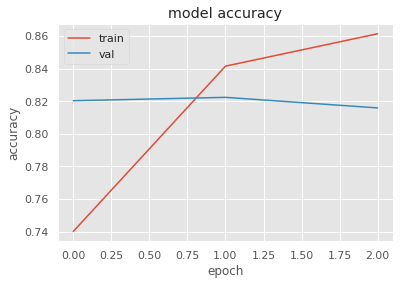

In [15]:
import keras
from matplotlib import pyplot as plt

print(history.history.keys())

#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


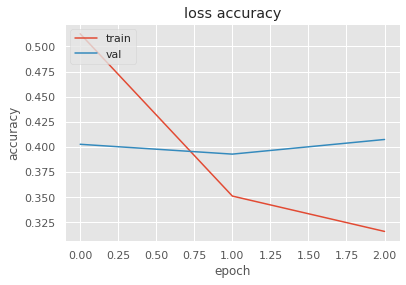

In [16]:
import keras
from matplotlib import pyplot as plt

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
df2 = pd.read_csv('dataset2.csv')
df2['text'] = df2.text.apply(lambda x: re.subn('^\s+|\(|\)|[:,0-9\'\)\(\\[\]]|@user|RT|(https://.*)', '', x)[0].lower())

Took a few samples based on the snippet above and using it for prediction

<hr>

<a id="approach-2-B"></a>

# Multiclass classification, and writing to an output file <a href="#navig">$[\uparrow]$</a>

All 3000 columns

The final predictions are only for the dominant emotion, which is quite not right, even though model accuracy is very large. `Many-to-many LSTM` has enough nuances, that needs to be carefully considered before using their results.  

* Single Emotion LSTM is accurate to upto `80%`
* Multi Emotion LSTM is barely `50%` and is just a rapid-prototype which helps get started. 

`Hyperparameter optimizations` may not help here because of the large amount of correlations involved

In [18]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences

# Glove
from numpy import array
from numpy import asarray
from numpy import zeros

In [19]:
dg = pd.read_csv('dataset1.csv')

In [20]:
tokenizer = Tokenizer(nb_words=2000, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,split=' ')
tokenizer.fit_on_texts(dg['text'].values)
X = tokenizer.texts_to_sequences(dg['text'].values)

print(np.array(X).shape)
X = pad_sequences(X)
X.shape, X

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


(20000,)


((20000, 30),
 array([[   0,    0,    0, ...,   25, 1425,  705],
        [   0,    0,    0, ...,    7,   97, 1309],
        [   0,    0,    0, ...,   43,  221,  654],
        ...,
        [   0,    0,    0, ...,  368,  138,  767],
        [   0,    0,    0, ...,  891,   61, 1426],
        [   0,    0,    0, ...,   15,  280,    5]], dtype=int32))

In [21]:
embed_dim = 128
lstm_out = 196
batch_size = 32
N = len(dg.columns[1:])

model = Sequential()
model.add(Embedding(2000, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(N,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 128)           256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 9)                 1773      
Total params: 512,573
Trainable params: 512,573
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
Y = dg[dg.columns[1:]].to_numpy() 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(14000, 30) (14000, 9)
(6000, 30) (6000, 9)


In [23]:
history = model.fit(X_train, Y_train, batch_size = batch_size, verbose = 2)

score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("Score: %.2f" % (score))
print("Validation Accuracy: %.2f" % (acc))

438/438 - 17s - loss: 0.2557 - accuracy: 0.4984
188/188 - 3s - loss: 0.2160 - accuracy: 0.5482
Score: 0.22
Validation Accuracy: 0.55


In [24]:
dh = pd.read_csv('dataset2.csv')

### Creating the dataframe + output csv file for prediction

In [25]:
N = len(dg.columns[1:])
aC = list(dg.columns[1:])
dC = {aC[e]:[] for e in range(N)}
odf = pd.DataFrame(dC)
aC, dC, odf.to_csv (r'classes.csv', index = False, header=True)

(['anger',
  'fear',
  'joy',
  'love',
  'sadness',
  'surprise',
  'thankfulness',
  'disgust',
  'guilt'],
 {'anger': [],
  'fear': [],
  'joy': [],
  'love': [],
  'sadness': [],
  'surprise': [],
  'thankfulness': [],
  'disgust': [],
  'guilt': []},
 None)

### Predicting and writing to output file

In [26]:
tokenizer = Tokenizer(nb_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
def f(sample_texts, odf=odf):

    txts = tokenizer.texts_to_sequences(sample_texts)
    txts = sequence.pad_sequences(txts, maxlen=30)
    preds = model.predict(txts)
    op = Y[np.argmax(preds)]
    odf = pd.read_csv('classes.csv')
    dn = {}
    for e in range(9):
        dn[aC[e]] = op[e]
        
    odf = odf.append(dn, ignore_index=True)
    odf.to_csv(r'classes.csv', index = False, header=True)
    return sample_texts

In [27]:
import re
dh['cleaned'] = dh.text.apply(lambda x: re.subn('^\s+|\(|\)|[:@,0-9\'\)\(\\[\]]|@user|RT|(https://.*)', '', x)[0].lower())
dh = dh.head(100)

In [29]:
output = pd.read_csv('classes.csv')
output.head()

anger  fear  joy  love  sadness  surprise  thankfulness  disgust  guilt
0    0.0   0.0  0.0   0.0      0.0       1.0           0.0      0.0    0.0
1    0.0   0.0  0.0   0.0      0.0       1.0           0.0      0.0    0.0
2    0.0   0.0  0.0   0.0      0.0       1.0           0.0      0.0    0.0
3    0.0   0.0  0.0   0.0      0.0       1.0           0.0      0.0    0.0
4    0.0   0.0  0.0   0.0      0.0       1.0           0.0      0.0    0.0

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise', 'thankfulness', 'disgust', 'guilt'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.99, 0.01, 0.0, 0.0]


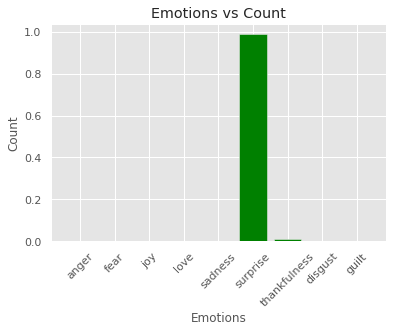

consistency check total em:  1.0


In [30]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

dh = output
N = dh.shape[0]
x = [e for e in dh.columns]
em = [dh[dh[e] == 1].shape[0]/N for e in dh.columns]

print(x, em)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, em, color='green')
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Emotions vs Count")

plt.xticks(x_pos, x, rotation='45')
plt.show()

print('consistency check total em: ', sum(em))